<a href="https://colab.research.google.com/github/HwayoungYoon/Data-Analysis-Practice/blob/master/kaggle-survey-2017/kaggle_DS_FAQ_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[부스트코스] 캐글 실습으로 배우는 데이터 사이언스**
## Ⅳ. 어떻게 하면 데이터 사이언티스트가 될 수 있을까요?
https://www.edwith.org/boostcourse-ds-kaggle/lecture/57567/

---

학습기간 : 2020년 07월 20일

---

* 출처 : 박조은 강사님 [Github](https://github.com/corazzon/KaggleStruggle/blob/master/kaggle-survey-2017/Kaggle-ML-DS-survey-2017-EDA-FAQ.ipynb) 

참고 URL :

* [Data Science FAQ | Kaggle](https://www.kaggle.com/rounakbanik/data-science-faq)

* [Novice to Grandmaster | Kaggle](https://www.kaggle.com/ash316/novice-to-grandmaster)

* 이 설문조사의 결과를 바탕으로 데이터사이언스와 머신러닝과 관련 된 인사이트를 얻어볼 수 있지 않을까 가설을 세워본다.

---

## **자주 묻는 질문 FAQ**
초보자들이 묻는 가장 일반적인 질문에 대한 답을 시각화 해본다.

# **데이터 파일**

**캐글러를 대상으로 한 설문조사**
* 설문기간 : 2017년 8월 7일부터 8월 25일까지
* 평균 응답 시간은 16.4 분
* 171 개 국가 및 지역에서 16,716 명의 응답자
* 특정 국가 또는 지역에서 응답자가 50 명 미만인 경우 익명을 위해 그룹을 '기타'그룹으로 그룹화
* 설문 조사 시스템에 신고 된 응답자를 스팸으로 분류하거나 취업 상태에 관한 질문에 답변하지 않은 응답자는 제외(이 질문은 첫 번째 필수 질문이기에 응답하지 않으면 응답자가 다섯 번째 질문 이후 진행되지 않음)
* 대부분의 응답자는 이메일 목록, 토론 포럼 및 소셜 미디어 Kaggle 채널을 통해 설문을 알게 됨
* 급여데이터는 일부 통화에 대해서만 받고 해당 되는 통화에 기준하여 작성하도록 함
* 미국 달러로 급여를 계산할 수 있도록 USD로 환산 한 csv를 제공
* 질문은 선택적
* 모든 질문이 모든 응답자에게 보여지는 것은 아님 
* 취업을 한 사람과 학생을 나누어 다른 질문을 함
* 응답자의 신원을 보호하기 위해 주관식과 객관식 파일로 분리
* 객관식과 자유 형식 응답을 맞추기 위한 키를 제공하지 않음
* 주관식 응답은 같은 행에 나타나는 응답이 반드시 동일한 설문 조사자가 제공하지 않도록 열 단위로 무작위 지정


**데이터 파일**

5 개의 데이터 파일을 제공

* schema.csv : 설문 스키마가있는 CSV 파일입니다. 이 스키마에는 multipleChoiceResponses.csv 및 freeformResponses.csv의 각 열 이름에 해당하는 질문이 포함되어 있습니다.
* multipleChoiceResponses.csv : 객관식 및 순위 질문에 대한 응답자의 답변, 각 행이 한 응답자의 응답
* freeformResponses.csv : Kaggle의 설문 조사 질문에 대한 응답자의 주관식 답변입니다. 임의로 지정되어 각 행이 같은 응답자를 나타내지 않음
* conversionRates.csv : R 패키지 "quantmod"에서 2017 년 9 월 14 일에 액세스 한 통화 변환율 (USD)
* RespondentTypeREADME.txt : schema.csv 파일의 "Asked"열에 응답을 디코딩하는 스키마입니다.

In [1]:
# Google Drive와 Colab 연동
# 실행 후 나오는 URL 접속하여 authorization code 받기
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
cd gdrive/My Drive/kaggle-survey/data

/content/gdrive/My Drive/kaggle-survey/data


In [3]:
# 노트북 안에서 그래프를 그리기 위해
%matplotlib inline

# Import the standard Python Scientific Libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress Deprecation and Incorrect Usage Warnings 
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
# 설문 스키마를 가져온 후 행, 열의 갯수 확인
question = pd.read_csv('schema.csv')
question.shape

(290, 3)

In [5]:
# 선다형 객관식 문제에 대한 응답을 가져온 후 행, 열의 갯수 확인
mcq = pd.read_csv('multipleChoiceResponses.csv', encoding="ISO-8859-1", low_memory=False)
mcq.shape

(16716, 228)

# **Q11. 데이터 사이언스 직업을 찾는데 가장 고려해야 할 요소는 무엇일까요?**

In [6]:
# 설문내용과 응답대상 확인
qc = question.loc[question[
    'Column'].str.contains('JobFactor')]
print(qc.shape)
qc.Question.values

(16, 3)


array(['How are you assessing potential job opportunities? - Opportunities for professional development',
       'How are you assessing potential job opportunities? - The compensation and benefits offered',
       "How are you assessing potential job opportunities? - The office environment I'd be working in",
       "How are you assessing potential job opportunities? - The languages, frameworks, and other technologies I'd be working with",
       "How are you assessing potential job opportunities? - The amount of time I'd have to spend commuting",
       'How are you assessing potential job opportunities? - How projects are managed at the company or organization',
       'How are you assessing potential job opportunities? - The experience level called for in the job description',
       "How are you assessing potential job opportunities? - The specific department or team I'd be working on",
       "How are you assessing potential job opportunities? - The specific role or job title I'd 

In [7]:
# 데이터 사이언스 직업을 찾는데 가장 고려해야 할 요소에 대한 데이터
job_factors = [
    x for x in mcq.columns if x.find('JobFactor') != -1]

In [8]:
jfdf = {}
for feature in job_factors:
    a = mcq[feature].value_counts()
    a = a/a.sum()
    jfdf[feature[len('JobFactor'):]] = a

jfdf = pd.DataFrame(jfdf).transpose()
jfdf

,Not important,Somewhat important,Very Important
Learning,0.024500,0.252323,0.723177
Salary,0.049928,0.488953,0.461119
Office,0.060554,0.405998,0.533449
Languages,0.071367,0.443165,0.485468
Commute,0.132289,0.522193,0.345518
Management,0.089983,0.466511,0.443506
ExperienceLevel,0.092232,0.494908,0.412860
Department,0.165105,0.482728,0.352166
Title,0.149971,0.444640,0.405390
CompanyFunding,0.149809,0.562298,0.287892


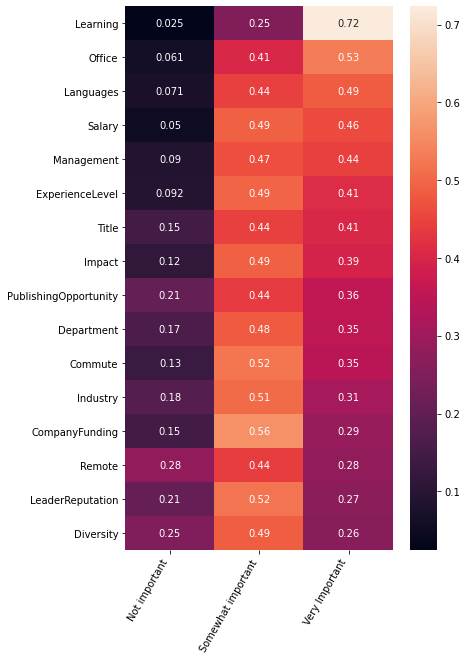

In [9]:
# 데이터 사이언스 직업을 찾는데 가장 고려해야 할 요소에 대한 시각화(heatmap)
plt.figure(figsize=(6,10))
plt.xticks(rotation=60, ha='right')
sns.heatmap(jfdf.sort_values('Very Important', 
                             ascending=False), annot=True)

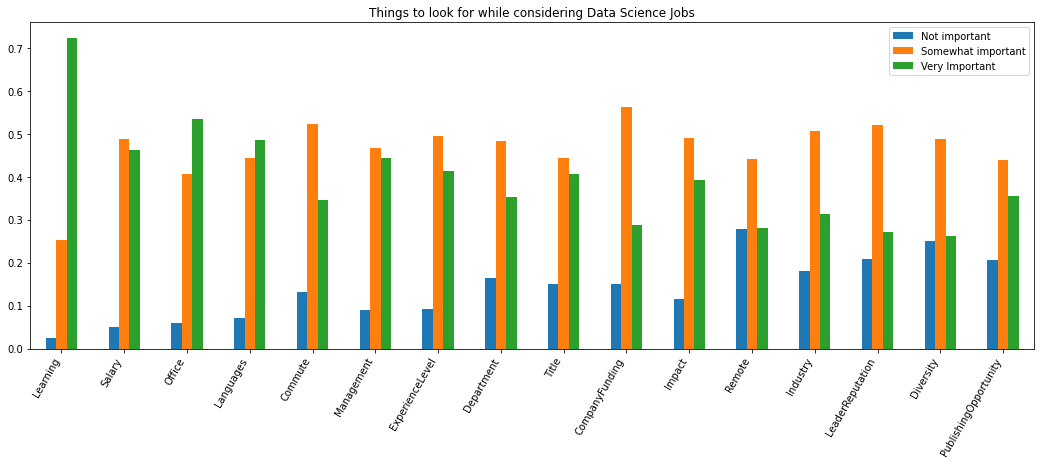

In [10]:
# 데이터 사이언스 직업을 찾는데 가장 고려해야 할 요소에 대한 시각화(bar plot)
jfdf.plot(kind='bar', figsize=(18,6), 
          title="Things to look for while considering Data Science Jobs")
plt.xticks(rotation=60, ha='right')
plt.show()

* 데이터 사이언티스트로 직업을 찾을 때 가장 고려할 요소는 배울 수 있는 곳인지(Learning), 사무실 근무환경(Office), 프레임워크나 언어(Languages), 급여(Salary), 경영상태(Management), 경력정도(ExperienceLevel) 순이라고 응답했다.

# **Q12. 데이터 사이언티스트가 되기 위해 학위가 중요할까요?**

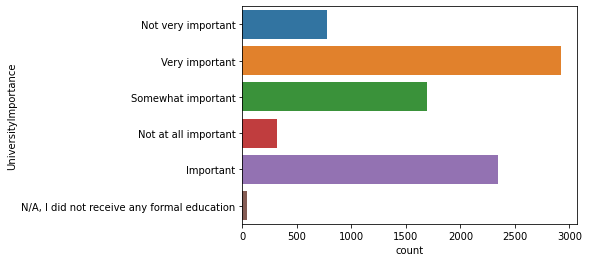

In [11]:
# 학위의 중요성에 대한 시각화
sns.countplot(y='UniversityImportance', data=mcq)

* 대부분의 응답자가 데이터 사이언티스트가 되기 위해 학위가 중요하다고 응답했다.

In [12]:
# 연령대별 학위의 중요성에 대한 응답 시각화
## plotly library 이용위한 설정
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.figure_factory as fig_fact

top_uni = mcq['UniversityImportance'].value_counts().head(5)
top_uni_dist = []
for uni in top_uni.index:
    top_uni_dist.append(
        mcq[(mcq['Age'].notnull()) & \
            (mcq['UniversityImportance'] == uni)]['Age'])

group_labels = top_uni.index

fig = fig_fact.create_distplot(top_uni_dist,group_labels)
py.iplot(fig, filename='University Importance by Age')

![대체 텍스트](https://ifh.cc/g/WKo7yV.png)

* 연령대 그래프를 찍어 본 것과 같은 형태의 그래프를 볼 수 있다. 20~30대는 대학 학위가 매우 중요하다고 생각하며, 연령대가 높은 응답자들은 그다지 중요하지 않다고 응답했다. 300명 미만의 응답자만이 학위가 중요하지 않다고 생각한다.
* 대부분의 응답자가 석사와 박사인 것을 고려해 봤을 때 이는 자연스러운 응답이다.

# **Q13. 어디에서 부터 데이터 사이언스를 시작해야 할까요?**

In [13]:
# 데이터 사이언스를 시작하는 방법에 대한 총 응답수
mcq[mcq['FirstTrainingSelect'].notnull()].shape

(14712, 228)

* 총 14712명이 데이터 사이언스를 시작하는 방법에 대해 응답했다.

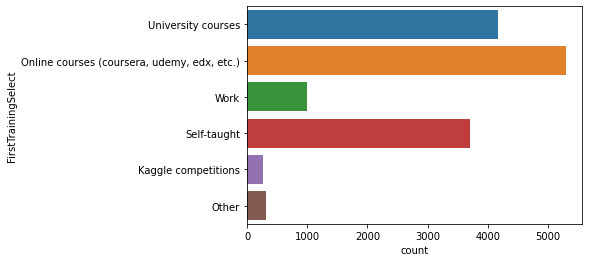

In [14]:
# 데이터 사이언스를 시작하는 방법에 대한 시각화
sns.countplot(y='FirstTrainingSelect', data=mcq)

* 대부분의 응답자가 학사 학위 이상으로 대학 교육에 대한 중요성을 부여했다. 그러나 가장 많은 응답자가 코세라, 유데미와 같은 온라인 코스(Online courses(coursera, udemy, edx, etc.))를 통해 데이터 사이언스를 공부했고 그 다음으로 대학 교육(University courses)이 차지하고 있다.
* 개인 프로젝트를 해보는 것이 중요하다고 답한 응답자의 수도 많은 편이다.

# **Q14. 데이터 사이언티스트 이력서에서 가장 중요한 것은 무엇일까요?**

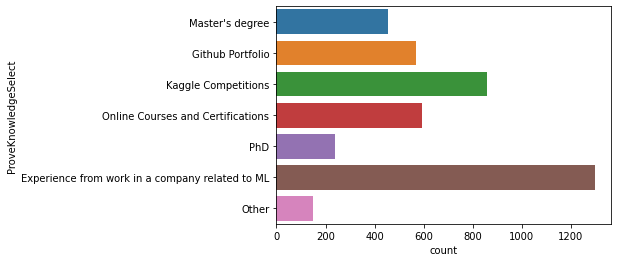

In [15]:
# 이력서에서 가장 중요한 것에 대한 시각화
sns.countplot(y='ProveKnowledgeSelect', data=mcq)

* 이력서에서 가장 중요한 것은 머신러닝과 관련 된 직무경험(Experience from work in a company related to ML)이고 다음으로 캐글 경진대회의 결과(Kaggle Competitions)라고 응답했다. 다음으로 온라인 강좌의 수료증(Online Courses and Certifications)이나 깃헙 포트폴리오(Github Portfolio) 순으로 중요하다고 응답했다.

# **Q15. 머신러닝 알고리즘을 사용하기 위해 수학이 필요할까요?**

* scikit과 같은 라이브러리는 세부 정보를 추상화하기 때문에 기본 기술을 몰라도 ML 모델을 프로그래밍 할 수 있다. 그럼에도 그 안에 있는 수학을 아는 것이 중요할까?

In [16]:
# 설문내용과 응답대상 확인
qc = question.loc[question[
    'Column'].str.contains('AlgorithmUnderstandingLevel')]
qc

,Column,Question,Asked
227,AlgorithmUnderstandingLevel,At which level do you understand the mathemati...,CodingWorker


In [17]:
# 머신러닝 알고리즘을 위한 수학의 필요성에 대한 총 응답수
mcq[mcq['AlgorithmUnderstandingLevel'].notnull()].shape

(7410, 228)

* 전체 응답자 중 현재 코딩 업무를 진행하고있는 7410명이 머신러닝 알고리즘을 사용하기 위해 어느 정도의 수학이 필요한지에 대해 응답했다.

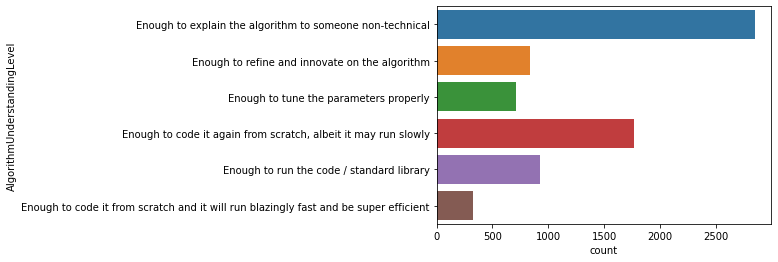

In [18]:
# 머신러닝 알고리즘을 위한 수학의 필요성에 대한 시각화
sns.countplot(y='AlgorithmUnderstandingLevel', data=mcq)

* 머신러닝 알고리즘을 위한 수학의 필요성에 대해 기술과 관련 없는 사람에게 설명할 수 있는 정도면 충분하다(Enough to explain the algorithm to someone non-technical)라는 응답이 가장 많으며 좀 더디더라도 밑바닥부터 다시 코딩해 볼 수 있는 게 중요하다(Enough to code it again from scratch, albeit it may run slowly), 코드를 돌려볼 수 있는 정도라면 충분하다(Enough to run the code/standard library), 알고리즘을 개선시킬 수 있을 정도라면 충분하다(Enough to refine and innovate on the algorithm)는 응답이 그 뒤를 잇는다.

# **Q16. 어디에서 일을 찾아야 할까요?**

In [19]:
# 설문내용과 응답대상 확인
question.loc[question[
    'Column'].str.contains(
    'JobSearchResource|EmployerSearchMethod')]

,Column,Question,Asked
108,EmployerSearchMethod,How did you find your current job? - Selected ...,CodingWorker-NC
109,EmployerSearchMethodOtherFreeForm,How did you find your current job? - Some othe...,CodingWorker-NC
271,JobSearchResource,Which resource has been the best for finding d...,Learners
272,JobSearchResourceFreeForm,Which resource has been the best for finding d...,Learners


* 코딩 업무를 진행하고 있는 사람들과 배우고있는 사람들이 어디에서 일을 찾는게 좋을지에 대하여 응답했다.

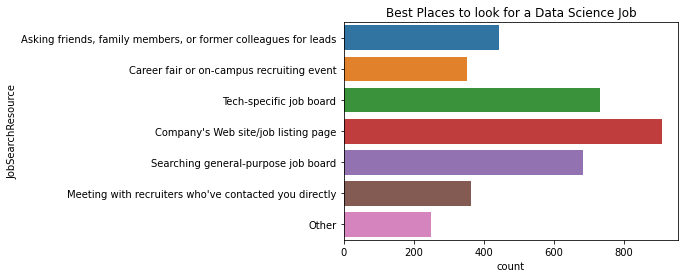

In [20]:
# 구직자들이 직업을 찾기 위한 플랫폼에 대한 시각화
plt.title("Best Places to look for a Data Science Job")
sns.countplot(y='JobSearchResource', data=mcq)

* 구직자들은 회사 웹사이트나 구직 사이트(Company's Web site/job listing page)로부터 직업을 찾고 그 다음으로 특정 기술의 채용 게시판(Tech-specific job board), 일반 채용 게시판(Searching general-purpose job board), 친구나 가족, 이전 직장 동료나 리더(Asking friends, family members, or former colleagues for leads)를 통해 채용 정보를 얻는다.

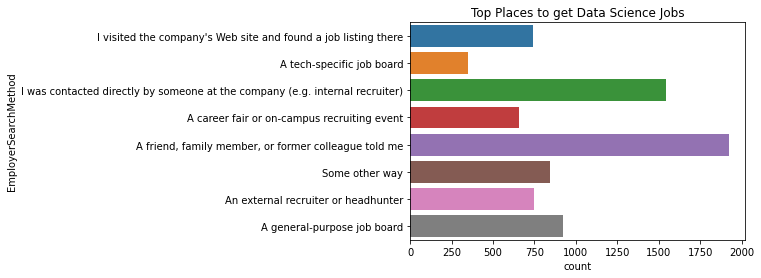

In [21]:
# 채용자들이 구인을 하기 위한 플랫폼에 대한 시각화
plt.title("Top Places to get Data Science Jobs")
sns.countplot(y='EmployerSearchMethod', data=mcq)

* 구직자는 주로 구직 사이트로부터 채용정보를 가장 많이 찾았다. 그러나 채용자는 친구, 가족, 이전 직장 동료 등의 추천(A friend, family member, or former colleague told me)을 통해 가장 많이 사람을 구하며 다음으로 리쿠르터나 특정 회사에 소속 된 사람에게 직접 연락(I was contacted directly by someone at the company(e.g. internal recruiter))을 해서 구하는 비율이 높다.

## **그럼 한국 사람들은 어떨까?**

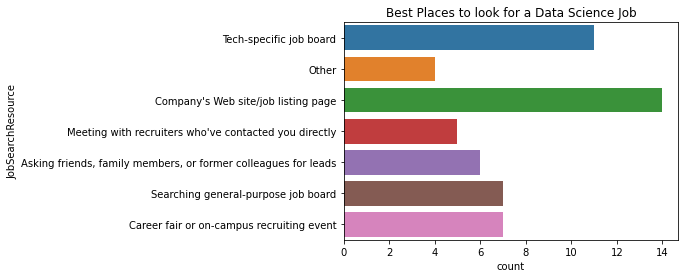

In [22]:
# 대한민국 구직자들이 직업을 찾기 위한 플랫폼에 대한 시각화
korea = mcq.loc[(mcq['Country']=='South Korea')]
plt.title("Best Places to look for a Data Science Job")
sns.countplot(y='JobSearchResource', data=korea)

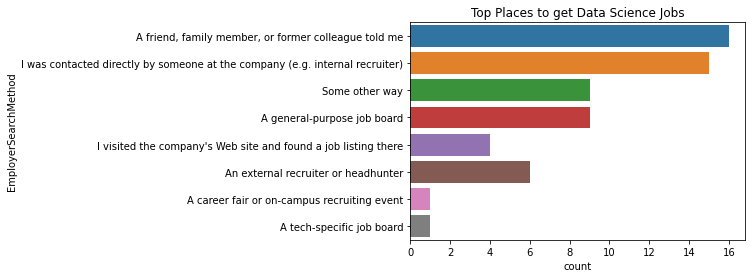

In [23]:
# 대한민국 채용자들이 구인을 하기 위한 플랫폼에 대한 시각화
plt.title("Top Places to get Data Science Jobs")
sns.countplot(y='EmployerSearchMethod', data=korea)

* 대한민국의 경우 구직자들이 직업을 찾는 플랫폼에 대한 응답과 채용자들이 구인을 하는 플랫폼에 대한 응답 모두 전체 응답과 같은 결과를 보인다.

# **결론**

* Python이 R보다 훨씬 많이 사용됨을 알 수 있었다.
* 하지만 Python과 R을 모두 사용하는 사람도 많다.
* 대부분의 경우 데이터 수집과 정제는 어려운 일이다.
* 인기있는 학습 플랫폼과 블로그, 유튜브 채널, 팟캐스트 등을 알게 되었다.
* 내년에 인기있는 기술로는 딥러닝과 텐서플로우가 큰 비중을 차지할 것이다.